# Parkinson's Disease Prediction 

# 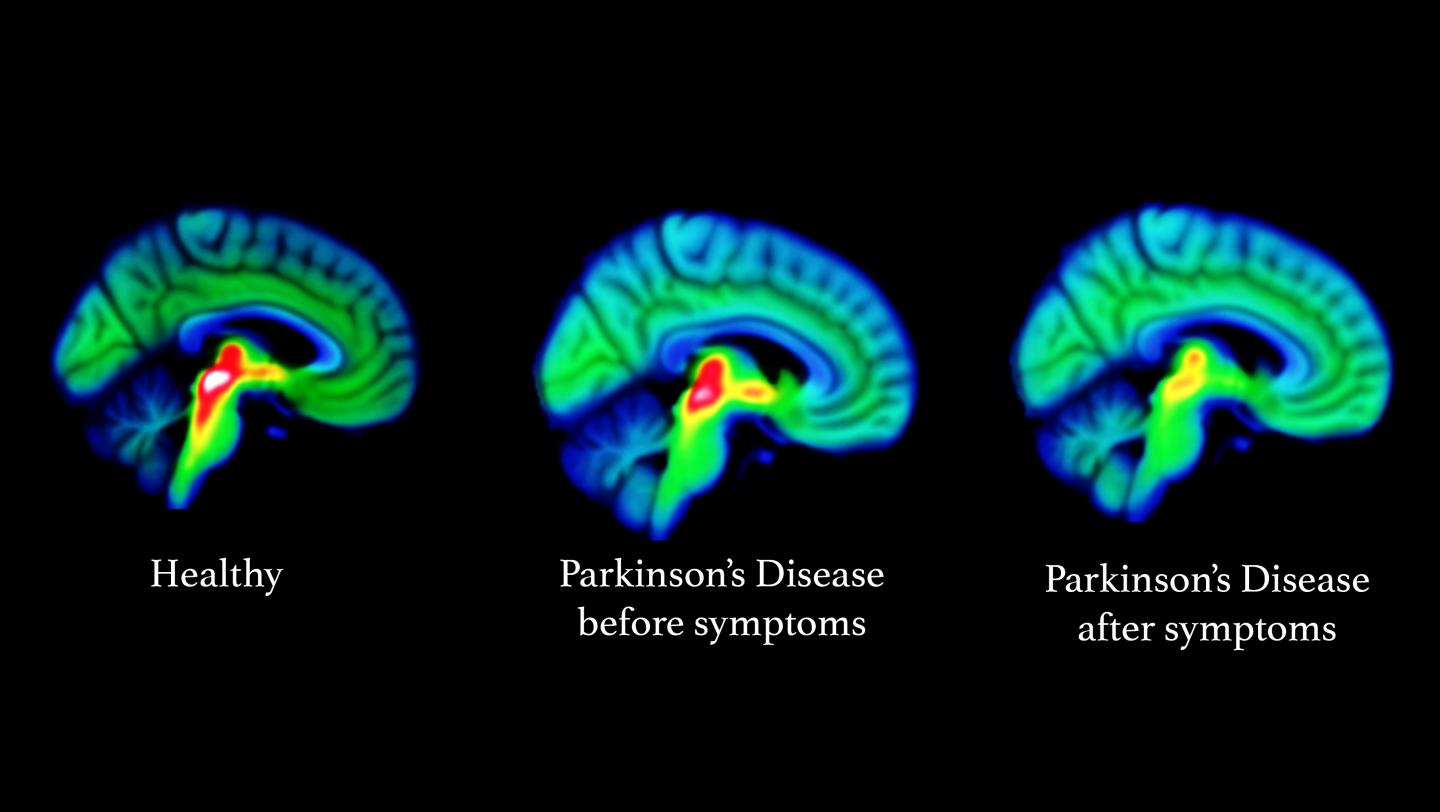

# Project Aim and Objective 

1. The primary aim of our project is to develop a machine learning model that can accurately predict the likelihood of Parkinson's disease in patients based on a range of input variables, such as age, gender, family history, and symptoms.
2. Test the prediction model on a large dataset of patient data to ensure accuracy and reliability. The model should be able to predict Parkinson's disease with a high degree of accuracy, and avoid false positives or false negatives.
3. Main objective is to focus on identifying the most efficient and accurate model for clinical use. This will enable doctors to use the most effective algorithm when diagnosing and treating patients with Parkinson's disease, improving overall patient outcomes.

## About Dataset
Context

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

Content
Matrix column entries (attributes):
#1.name - ASCII subject name and recording number
#2.MDVP:Fo(Hz) - Average vocal fundamental frequency
#3.MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#4.MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#5.MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
#6.MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#7.NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
#8.status - The health status of the subject (one) - Parkinson's, (zero) - healthy
#9.RPDE, D2 - Two nonlinear dynamical complexity measures
#10.DFA - Signal fractal scaling exponent
#11.spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Importing Libraries 

In [15]:
# Dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
# data preprocessing
from sklearn.preprocessing import RobustScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from xgboost import XGBClassifier
# loading model
import pickle

In [16]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [17]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('../dataset/parkinsons.csv')

# Exploratory Data Analysis 

In [18]:
# display entire dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.

In [19]:
print ('*'*10,'Dataset Information','*'*10)
print(df.info())

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HN

In [20]:
#Generating descriptive statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


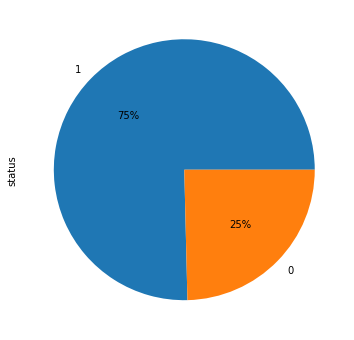

In [21]:
# # Distribution of the target variable
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%",figsize = (6,6))
df.plot

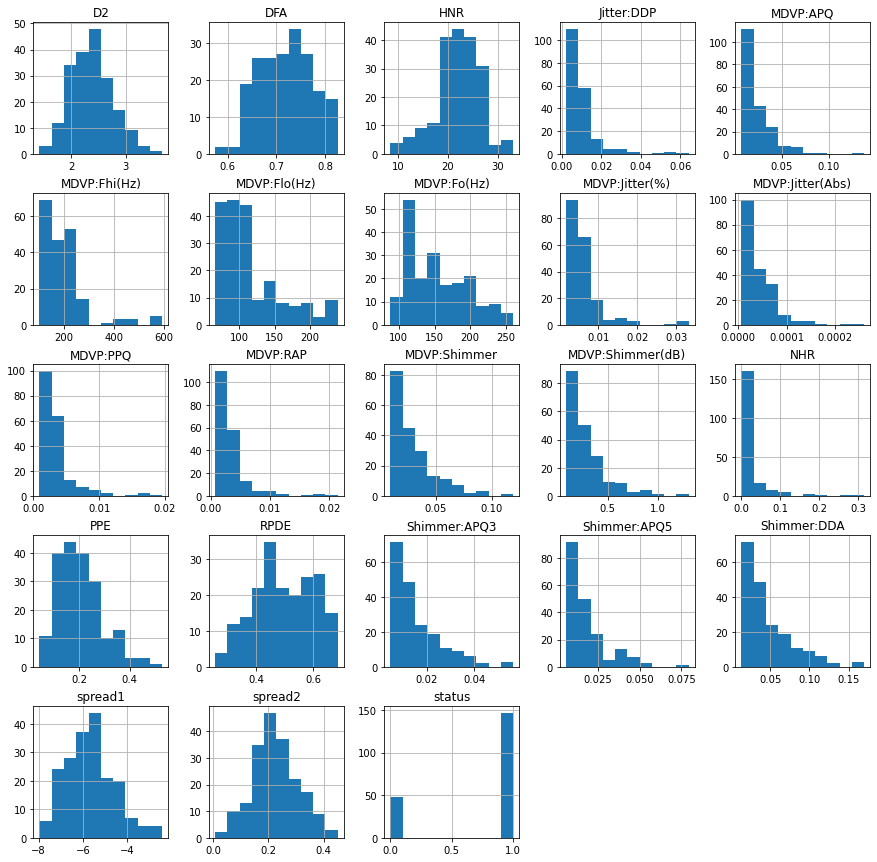

In [22]:
# We can see some of the data is normally distributed and most of the attributes are right skewed
df.hist(figsize=(15,15));

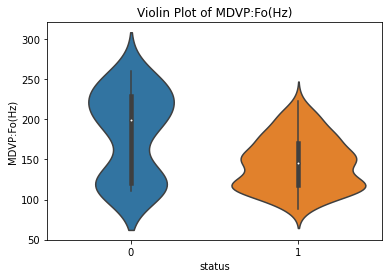

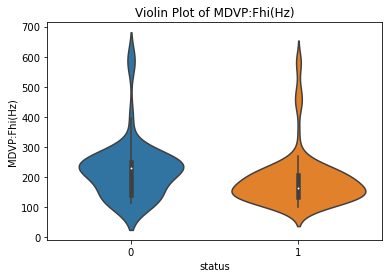

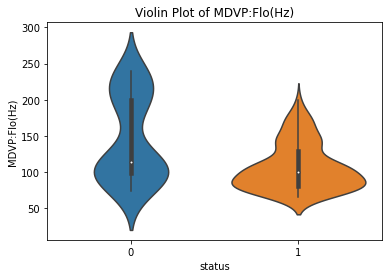

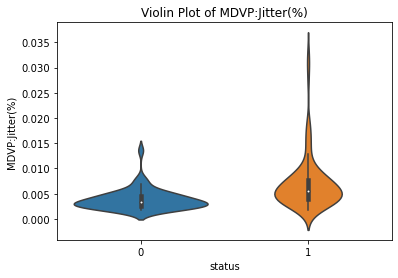

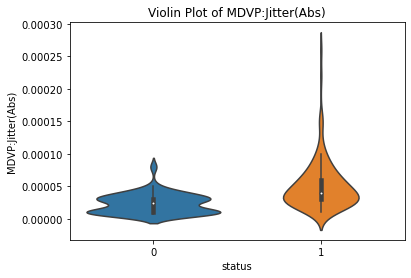

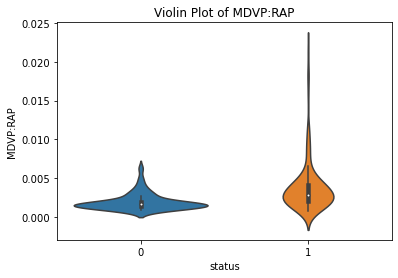

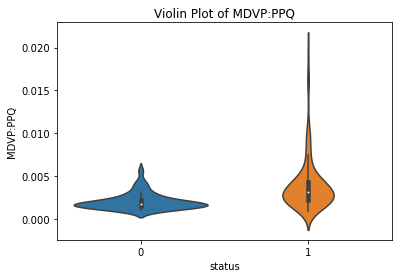

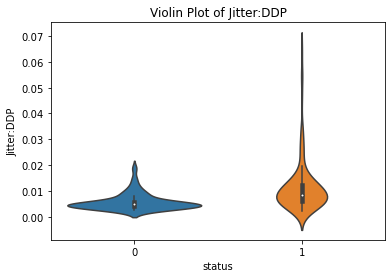

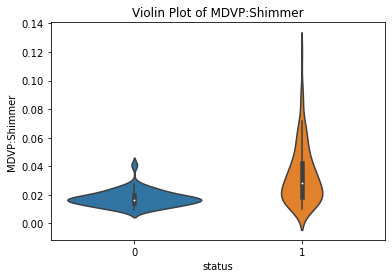

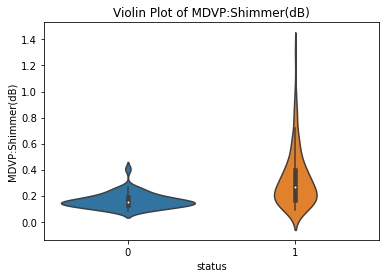

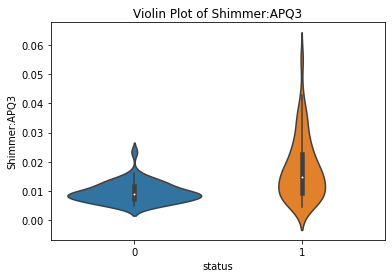

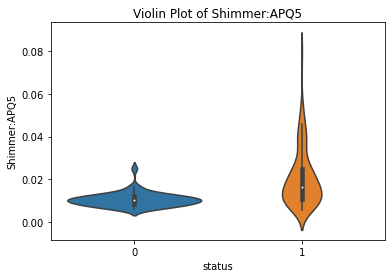

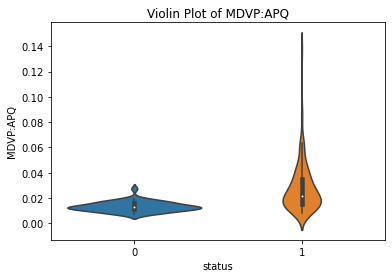

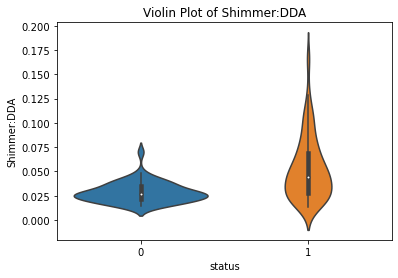

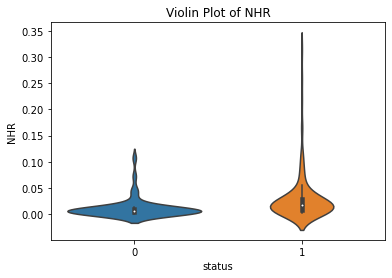

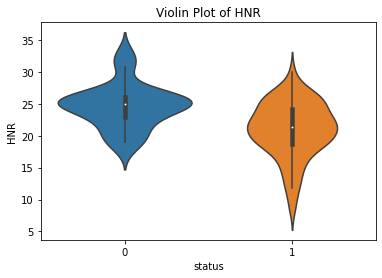

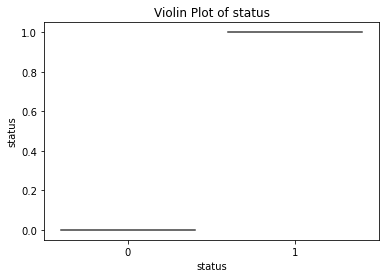

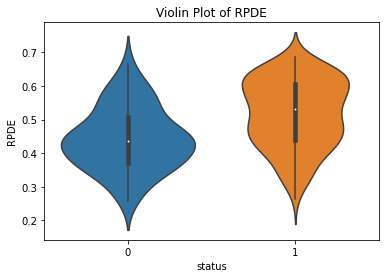

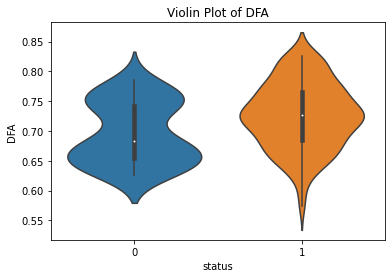

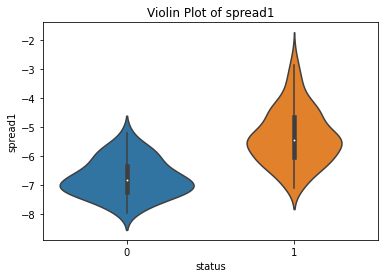

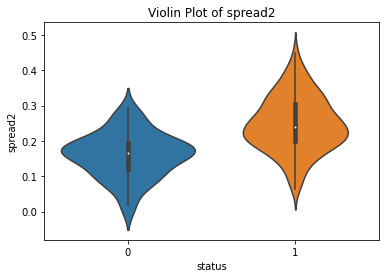

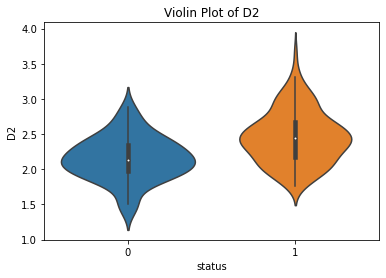

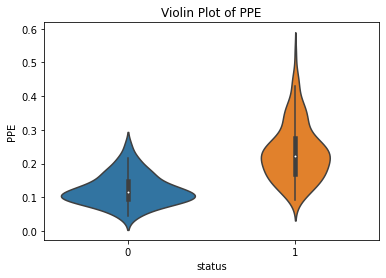

In [23]:
# Violin plot of each feature
features = list(df.columns)
features.remove('name')
for feature in features:
    sns.violinplot(x='status', y=feature, data=df, split=True)
    plt.title(f'Violin Plot of {feature}')
    plt.show()

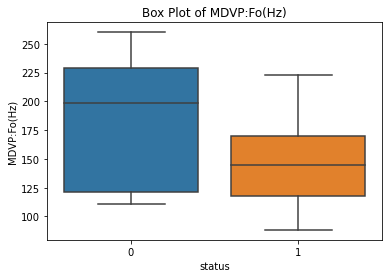

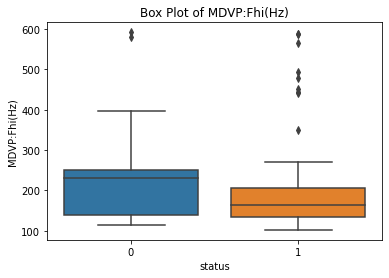

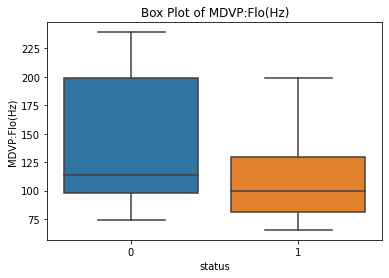

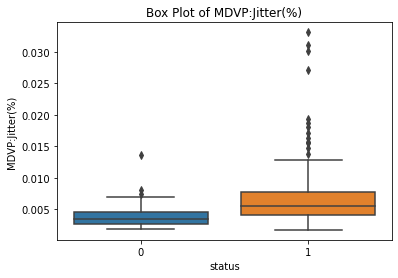

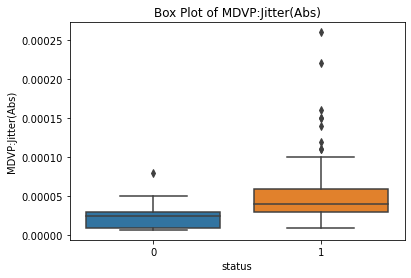

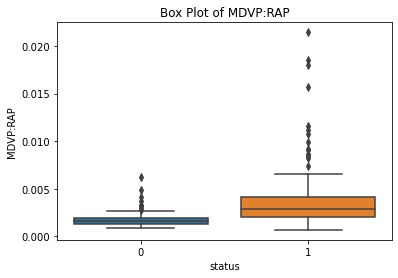

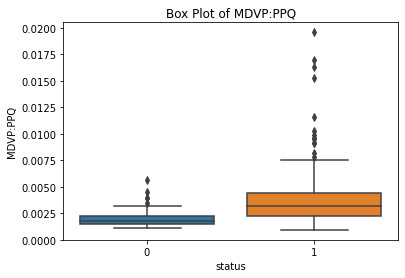

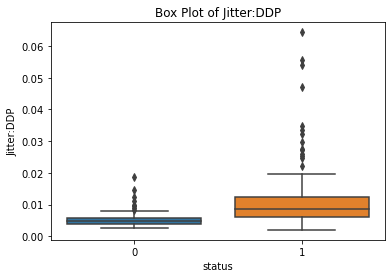

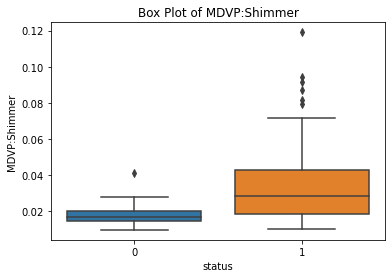

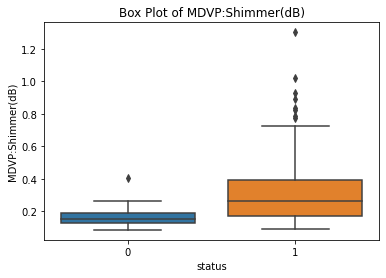

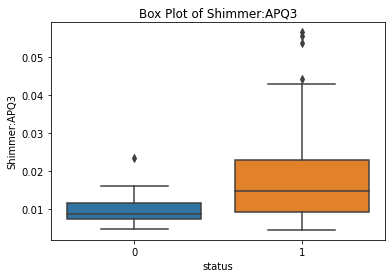

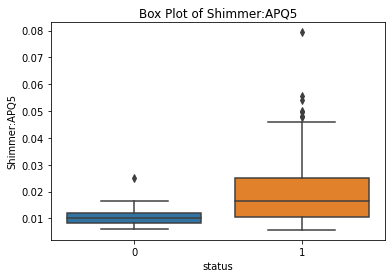

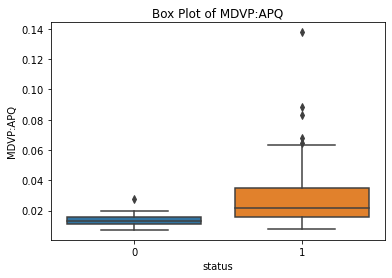

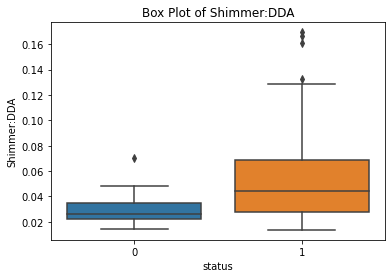

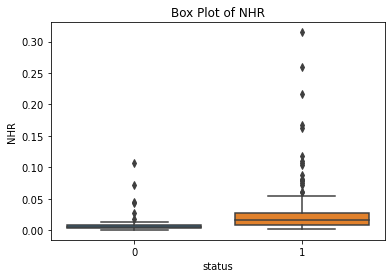

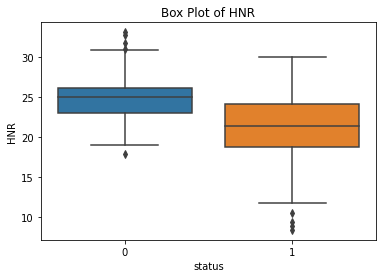

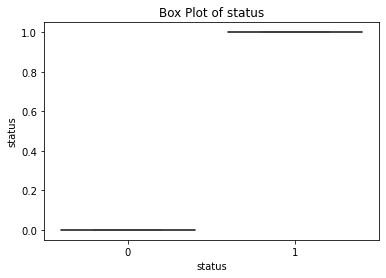

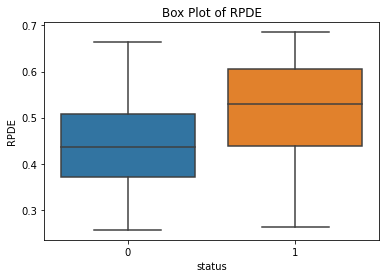

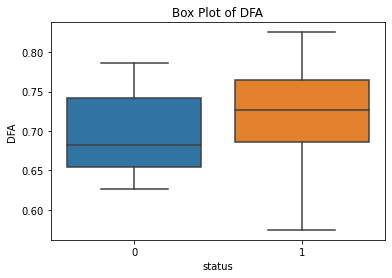

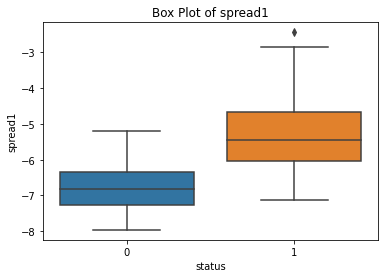

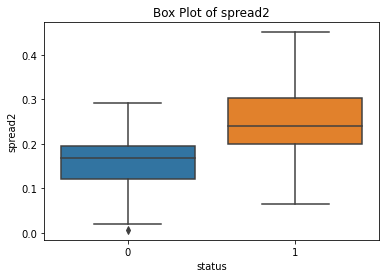

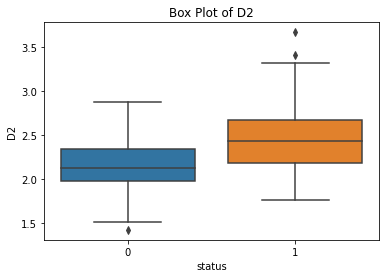

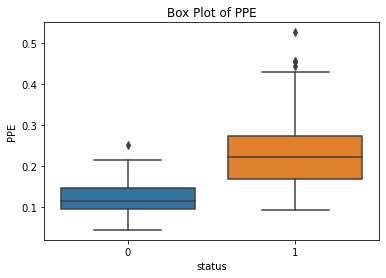

In [24]:
# Box plot of each feature
for feature in features:
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Data Preprocessing 

In [25]:
# Getting the target variable
y = df["status"]
X = df.drop(columns=['name','status'], axis=1)

# Data Train , Test split with 80% for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Scaler object for normalizing the input data to have zero mean and unit variance.
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# eXtreme Gradient Boosting Model 

In [26]:
m1 = 'Extreme Gradient Boost'
xgb = XGBClassifier(use_label_encoder=False,eval_metric='rmse')

# Set problematic attributes to None
new_attrs = ['grow_policy', 'max_bin', 'eval_metric', 'callbacks', 'early_stopping_rounds', 'max_cat_to_onehot', 'max_leaves', 'sampling_method' , 'feature_types', 'max_cat_threshold']
for attr in new_attrs:
    setattr(xgb, attr, None)
    
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print('\033[1m' + "Accuracy on Testing Data:" + '\033[0m', xgb_acc_score*100, '\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[10  0]
 [ 2 27]]


Accuracy on Testing Data: 94.87179487179486 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



# Inputing raw data

In [27]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# performing scalling 
input_data = scaler.transform(input_data_reshaped)

prediction = xgb.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print("The Person does not have a Parkinson's Disease")
else:
  print("The Person has Parkinson's Disease")

[0]
The Person does not have a Parkinson's Disease


# Saving the Model 

In [28]:
# Saving model as heart_disease_prediction.sav file 
filename = 'Parkinsons_disease_prediction.sav'
pickle.dump(xgb, open(filename, 'wb'))
pickle.dump(scaler, open('scaler_parkinsons.sav', 'wb'))

# loading the saved model
loaded_model = pickle.load(open('Parkinsons_disease_prediction.sav', 'rb'))

# Printing the cols 
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
